In [1]:
import cv2

print('hello, OpenCV', cv2.__version__)

hello, OpenCV 4.5.5


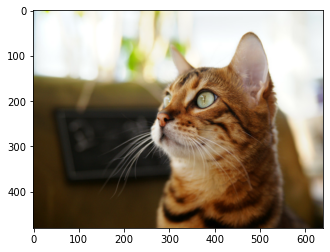

In [2]:
import matplotlib.pyplot as plt

img = cv2.imread('cat.bmp')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [3]:
if img is None:
    print('Image load failed!')
    sys.exit()
    
cv2.imwrite('cat_gray.png', img) # 폴더에 다른 이름으로 저장되어 있음 
cv2.namedWindow('image')
cv2.imshow('image', img)
cv2.waitKey()

cv2.destroyAllWindows()
# 갑자기 큰 사진으로 보여짐... 

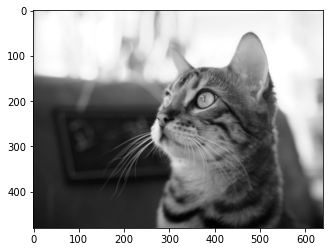

In [4]:
img = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

if img is None:
    print('Image load failed!')
    sys.exit()

cv2.imwrite('cat_gray.png', img)
cv2.imshow('image', img)
cv2.waitKey() # 영상이 나타나게하는 메소드 

cv2.destroyAllWindows()

In [5]:
# cv2.imshow('image',img)
# cv2.waitKey()

# while True:
#     if cv2.waitKey() == ord('q'):
#         break

# cv2.destroyAllWindows()

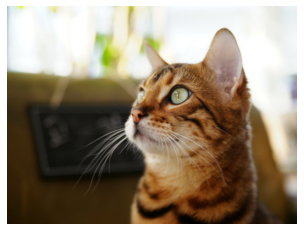

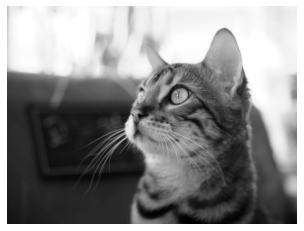

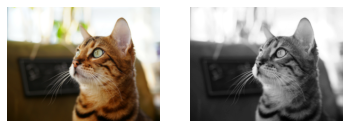

In [8]:
import cv2
import matplotlib.pyplot as plt

#컬러 영상 출력 
imgBGR = cv2.imread('cat.bmp')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

plt.axis('off') #눈금 안생기게 하는 옵션임.
plt.imshow(imgRGB)
plt.show()

#그레이스케일 영상 출력 
imgGray = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)

plt.axis('off')
plt.imshow(imgGray, cmap='gray')
plt.show()

#두 개의 영상을 함께 출력
plt.subplot(121), plt.axis('off'), plt.imshow(imgRGB)
plt.subplot(122), plt.axis('off'), plt.imshow(imgGray, cmap='gray')
plt.show()

In [ ]:

# 폴더 이미지 파일 목록 읽기
# os.listdir()
# glob.glob()


In [23]:
import sys
import glob
import cv2


# 이미지 파일을 모두 img_files 리스트에 추가
# images 폴더 밑에 jpg로 끝나는 파일을 다 불러옴
img_files = glob.glob('.\\images\\*.jpg')

if not img_files:
    print("There are no jpg files in 'images' folder")
    sys.exit()

# 전체 화면으로 'image' 창 생성
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

# 무한 루프
cnt = len(img_files)
idx = 0

while True:
    img = cv2.imread(img_files[idx])

    if img is None:
        print('Image load failed!')
        break

    cv2.imshow('image', img)
    if cv2.waitKey(1000) >= 0:
        break

    idx += 1
    if idx >= cnt:
        idx = 0

cv2.destroyAllWindows()

In [20]:
# 영상 불러오기 
img1 = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('cat.bmp', cv2.IMREAD_COLOR)

if img1 is None or img2 is None:
    print('image load failed')
    sys.exit()
    
#영상의 속성 참조
print('type(img1):',type(img1))
print('img1.shape:', img1.shape)
print('img2.shape:', img2.shape)
print('img1.dtype:', img1.dtype)

h, w = img2.shape[:2]
print('img2 size: {} x {}'.format(w, h))

if len(img1.shape) ==2:
    print('img1 is a grayscale image')
elif len(img1.shape) ==3:
    print('img1 is a truecolor image')

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.waitKey()

#영상의 픽셀 값 참조
for y in range(h):
    for x in range(w):
        img1[y, x] = 255
        img2[y, x] = (0, 0, 255)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.waitKey()

cv2.destroyAllWindows()


type(img1): <class 'numpy.ndarray'>
img1.shape: (480, 640)
img2.shape: (480, 640, 3)
img1.dtype: uint8
img2 size: 640 x 480
img1 is a grayscale image


In [25]:
import numpy as np
import cv2

#새 영상 생성하기
img1 = np.empty((240, 320), dtype = np.uint8) #그레이스케일 이미지
img2 = np.zeros((240, 320, 3), dtype = np.uint8) # 컬러 이미지
img3 = np.ones((240, 320), dtype = np.uint8) * 255 # dark gray
img4 = np.full((240, 320, 3), (0, 255, 255), dtype = np.uint8) # Yellow

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.imshow('img4', img4)
cv2.waitKey()
cv2.destroyAllWindows()

In [27]:
# 영상 복사 
img1 = cv2.imread('HappyFish.jpg')

img2 = img1
img3 = img1.copy()

#img1.fill(255)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey()
cv2.destroyAllWindows()

In [28]:
img1 = cv2.imread('HappyFish.jpg')

img2 = img1[40:120, 30:150]
img3 = img1[40:120, 30:150].copy()

img2.fill(0)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
import sys
import cv2

#마스크 영상을 이용한 영상 합성
src = cv2.imread('airplane.bmp', cv2.IMREAD_COLOR)
mask = cv2.imread('mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.imread('field.bmp', cv2.IMREAD_COLOR)

if src is None or mask is None or dst is None:
    print('Image load f')
    sys.exit()

cv2.copyTo(src,mask, dst)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('mask', mask)
cv2.waitKey()
cv2.destroyAllWindows()

In [37]:
import sys
import cv2
import numpy as np

# 두 개의 동영상을 열어서 cap1, cap2로 지정
cap1 = cv2.VideoCapture('video1.mp4')

cap2 = cv2.VideoCapture('video2.mp4')

if not cap1.isOpened() or not cap2.isOpened():
    print('video open failed!')
    sys.exit()
    
# 두 동영상의 크기, FPS는 같다고 가정함 
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap1.get(cv2.CAP_PROP_FPS)
effect_frames = int(fps * 2)

print('frame_cnt1:', frame_cnt1)
print('frame_cnt2:', frame_cnt2)
print('FPS:', fps)


delay = int(1000/fps)

w = round(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

# 출력 동영상 객체 생성
out = cv2.VideoWriter('output.avi', fourcc, fps, (w, h))

# 1번 동영상 복사 
for i in range(frame_cnt1 - effect_frames):
    ret1, frame1 = cap1.read()
    
    if not ret1:
        print('frame read error!')
        sys.exit()
    
    out.write(frame1)
    print('.', end='')
    
    cv2.imshow('output', frame1)
    cv2.waitKey(delay)

    
# 1번 동영상 뒷부분과 2번 동영상 앞부분을 합성
for i in range(effect_frames):
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()
    
    if not ret1 or not ret2:
        print('frame read error!')
        sys.exit()
        
    dx = int (w / effect_frames) * i
    
    frame = np. zeros((h, w, 3), dtype = np.uint8)
    frame[:, 0:dx, :] = frame2[:, 0:dx, :]
    frame[:, dx:w, :] = frame1[:, dx:w, :]
    
    out.write(frame)
    print('.', end= '')
    
    cv2.imshow('output', frame)
    cv2.waitKey(delay)
    
# 2번 동영상을 복사

for i in range(effect_frames, frame_cnt2):
    ret2, frame = cap2.read()
    
    if not ret2:
        print('frame read error!')
        sys.exit()
        
    out. write(frame2)
    print('.', end='')
    
    cv2.imshow('output', frame2)
    cv2.waitKey(delay)
    
print('\noutput.avi file is successfully generated!')

cap1.release()
cap2.release()
out.release()
cv2.destroyAllWindows()
    

frame_cnt1: 85
frame_cnt2: 121
FPS: 24.0
.....................................

frame read error!


SystemExit: 